In this tutorial, we focus on suppliers selection mainly based on CQI Quality (ignoring the price).

- Coffee Quality Ranking by country.

- Top 10 high quality suppliers.

- visualise data on map of all suppliers

- Important features for Coffee quality.



## Data Cleaning

In [91]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Load the data
df = pd.read_csv('Coffee_data.csv', index_col=0)

In [93]:
pd.concat([df.head(), df.tail()])

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,...,NaN,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,nuevo oriente,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32
1312,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.00,1400.00,1400.00


In [94]:
# df.head().append(df.tail())

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1163 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1089 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grading.D

In [96]:
# Create a useful feature column list for analysis
col_name = ['Owner','Owner.1', 'Country.of.Origin', 'Harvest.Year', 
            'Grading.Date','Processing.Method', 'Aroma', 'Flavor', 
            'Aftertaste', 'Acidity','Body', 'Balance', 'Uniformity', 
            'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 
            'Moisture', 'Category.One.Defects', 'Category.Two.Defects', 
            'Quakers','Expiration', 'altitude_mean_meters']

train = df[col_name]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner                 1304 non-null   object 
 1   Owner.1               1304 non-null   object 
 2   Country.of.Origin     1310 non-null   object 
 3   Harvest.Year          1264 non-null   object 
 4   Grading.Date          1311 non-null   object 
 5   Processing.Method     1159 non-null   object 
 6   Aroma                 1311 non-null   float64
 7   Flavor                1311 non-null   float64
 8   Aftertaste            1311 non-null   float64
 9   Acidity               1311 non-null   float64
 10  Body                  1311 non-null   float64
 11  Balance               1311 non-null   float64
 12  Uniformity            1311 non-null   float64
 13  Clean.Cup             1311 non-null   float64
 14  Sweetness             1311 non-null   float64
 15  Cupper.Points         1311

- We keep both Owner and Owner1 columns to check if the missing values in each column are identical.
- We keep Grading Date which is related to harvest year which might impact coffee quality.

In [98]:
# First, let's check the 7 missing values in Owner
train[train['Owner.1'].isnull()]

,Owner,Owner.1,Country.of.Origin,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
365,NaN,NaN,Honduras,2014,"April 8th, 2014",Natural / Dry,7.67,7.50,7.67,7.50,...,10.0,10.0,7.83,83.50,0.10,0,3,0,"April 8th, 2015",1350.0
460,NaN,NaN,Honduras,2014,"April 8th, 2014",Natural / Dry,7.67,7.67,7.50,7.67,...,10.0,10.0,7.50,83.17,0.11,0,3,0,"April 8th, 2015",1350.0
603,NaN,NaN,Colombia,2012,"April 11th, 2012",Washed / Wet,7.50,7.58,7.42,7.67,...,10.0,10.0,7.50,82.75,0.00,0,0,0,"April 11th, 2013",1625.0
849,NaN,NaN,Honduras,2014,"May 16th, 2014",Natural / Dry,7.50,7.50,7.33,7.33,...,10.0,10.0,7.50,81.83,0.10,0,4,0,"May 16th, 2015",1350.0
883,NaN,NaN,Honduras,2014,"May 16th, 2014",Natural / Dry,7.50,7.33,7.50,7.50,...,10.0,10.0,7.50,81.67,0.10,0,5,0,"May 16th, 2015",1400.0
976,NaN,NaN,Honduras,2015,"March 11th, 2015",Natural / Dry,7.42,7.33,7.00,7.42,...,10.0,10.0,7.33,81.17,0.13,0,1,0,"March 10th, 2016",1450.0
1045,NaN,NaN,Honduras,2015,"March 11th, 2015",Natural / Dry,7.25,7.33,7.08,7.50,...,10.0,10.0,7.00,80.75,0.13,0,1,0,"March 10th, 2016",1450.0


When Owner's value is NaN, Owner.1's value is also NaN. 

In [100]:
# Let's check the original dataframe with Honduras as Country of Origin
df[(df['Country.of.Origin'] == 'Honduras')]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,Arabica,bismarck castro,Honduras,los hicaques,102,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,3,"May 18th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
123,Arabica,cadexsa,Honduras,cerro bueno,NaN,cadexsa,13-63-174,cadexsa,1450 msnm,marcala,...,Green,4,"April 25th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
181,Arabica,bismarck castro,Honduras,las cuchillas,152,cigrah s.a de c.v.,13-111-023,cigrah s.a de c.v,1500,comayagua,...,Green,3,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
183,Arabica,bismarck castro,Honduras,los hicaques,76,dry mill,13-111-032,cigrah s.a de c.v,1500,central region,...,Green,2,"April 4th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
243,Arabica,bismarck castro,Honduras,las cuchillas,96,cigrah s.a de c.v.,13-111-038,cigrah s.a de c.v,1500,comayagua,...,Green,5,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
317,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13 / 111 / 053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
365,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-240,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
447,Arabica,cadexsa,Honduras,bethel,427,dry mill,13-63-214,cadexsa,1450,marcala,...,Blue-Green,1,"May 2nd, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
459,Arabica,mayra yessenia torres,Honduras,el cerron,NaN,rio hamaca,13/01/2369,"olam honduras, s.a.",1450 msnn,san marcos,...,Green,5,"April 12th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
460,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-193,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0


As can be seen, these null values from Honduras are from los hicaques farm.

In [102]:
df[(df['Country.of.Origin'] == 'Honduras') & (df['Farm.Name'] == 'los hicaques')]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,Arabica,bismarck castro,Honduras,los hicaques,102,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,3,"May 18th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
183,Arabica,bismarck castro,Honduras,los hicaques,76,dry mill,13-111-032,cigrah s.a de c.v,1500,central region,...,Green,2,"April 4th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1500.0,1500.0,1500.0
317,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13 / 111 / 053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
365,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-240,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
460,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-193,cigrah,1350,comayagua,...,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
589,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,6,"April 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
706,Arabica,bismarck castro,Honduras,los hicaques,63,cigrah s.a de c.v.,13-111-022,cigrah s.a de c.v,1396,comayagua,...,Green,8,"April 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1396.0,1396.0,1396.0
818,Arabica,bismarck castro,Honduras,los hicaques,63,cigrah s.a de c.v.,13-111-022,cigrah s.a de c.v,1400,comayagua,...,Green,1,"June 1st, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
976,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-037,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
1045,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-035,cigrah,1450 mals,central region,...,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0


From the table above we can see that the missing Owner value is highly likely to be 'bismarck castro' in Honduras.

Likewise, we can check the null value from Colombia

In [104]:
df[(df['Country.of.Origin'] == 'Colombia') & (df['Farm.Name'] == 'supply chain ecom cca s.a.')]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
603,Arabica,NaN,Colombia,supply chain ecom cca s.a.,NaN,south huila,3-79-0334,ecom cca s.a.,1400 thru 1850,south huila,...,Blue-Green,0,"April 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1400.0,1850.0,1625.0


There is only one missing value in Colombia with Farm Name supply chain ecom cca s.a., we can either delete it or replace with its Company name

In [106]:
# Replace null values
train.loc[(train['Country.of.Origin'] == 'Honduras') & (train['Owner.1'].isnull()), 'Owner.1'] = 'Bismarck castro'
train.loc[603, 'Owner.1'] = 'ecom cca s.a.'

In [107]:
train['Owner.1'].isnull().sum()

0

In [108]:
# Drop duplicate owner columns
train.drop(columns=['Owner'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 1 to 1312
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner.1               1311 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Harvest.Year          1264 non-null   object 
 3   Grading.Date          1311 non-null   object 
 4   Processing.Method     1159 non-null   object 
 5   Aroma                 1311 non-null   float64
 6   Flavor                1311 non-null   float64
 7   Aftertaste            1311 non-null   float64
 8   Acidity               1311 non-null   float64
 9   Body                  1311 non-null   float64
 10  Balance               1311 non-null   float64
 11  Uniformity            1311 non-null   float64
 12  Clean.Cup             1311 non-null   float64
 13  Sweetness             1311 non-null   float64
 14  Cupper.Points         1311 non-null   float64
 15  Total.Cup.Points      1311

We can also see that there is a missing value in Country of Origin, let's check.

In [110]:
train[train['Country.of.Origin'].isnull()]

,Owner.1,Country.of.Origin,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
1198,Racafe & Cia S.C.A,NaN,NaN,"March 1st, 2011",NaN,6.75,6.75,6.42,6.83,7.58,...,10.0,10.0,7.25,79.08,0.1,0,3,0,"February 29th, 2012",NaN


It contains null values for other features too, so we can simply drop this row.                                                                                                              

In [112]:
train.tail(1)

,Owner.1,Country.of.Origin,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters
1312,Bismarck Castro,Honduras,2017,"April 28th, 2017",NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.12,0,2,0,"April 28th, 2018",1400.0


We also drop the last row as it contains mostly 0 values.

In [114]:
train.drop(index=[1198,1312], inplace=True) 

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1310
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner.1               1309 non-null   object 
 1   Country.of.Origin     1309 non-null   object 
 2   Harvest.Year          1263 non-null   object 
 3   Grading.Date          1309 non-null   object 
 4   Processing.Method     1159 non-null   object 
 5   Aroma                 1309 non-null   float64
 6   Flavor                1309 non-null   float64
 7   Aftertaste            1309 non-null   float64
 8   Acidity               1309 non-null   float64
 9   Body                  1309 non-null   float64
 10  Balance               1309 non-null   float64
 11  Uniformity            1309 non-null   float64
 12  Clean.Cup             1309 non-null   float64
 13  Sweetness             1309 non-null   float64
 14  Cupper.Points         1309 non-null   float64
 15  Total.Cup.Points      1309

After the initial data cleaning, we can see that most null values are gone, except in the Harvest.Year, Processing.Method and altitude_mean_meters columns. 

Let's perform further feature engineering in the following section.

## Feature Engineering

In [118]:
train['Grading.Date'].head()

1     April 4th, 2015
2     April 4th, 2015
3      May 31st, 2010
4    March 26th, 2015
5     April 4th, 2015
Name: Grading.Date, dtype: object

In [119]:
# Parse Grading date
train['GradingDate'] = pd.to_datetime(train['Grading.Date'], format='mixed', errors='coerce',
                                      infer_datetime_format=True)
train.GradingDate.head()

1   2015-04-04
2   2015-04-04
3   2010-05-31
4   2015-03-26
5   2015-04-04
Name: GradingDate, dtype: datetime64[ns]

In [120]:
# Create new Grading Year feature
train['GradingYear'] = train.GradingDate.dt.year

In [121]:
train['Expiration'].head()

1     April 3rd, 2016
2     April 3rd, 2016
3      May 31st, 2011
4    March 25th, 2016
5     April 3rd, 2016
Name: Expiration, dtype: object

In [188]:
# Parse the Expiration date
train.loc[:, 'Expiration'] = pd.to_datetime(train['Expiration'], format='mixed', errors='coerce', infer_datetime_format=True)
train['ExpireYear'] = train.Expiration.dt.year
train.ExpireYear.head()

1    2016
2    2016
3    2011
4    2016
5    2016
Name: ExpireYear, dtype: int32

In [190]:
train['Harvest.Year'].unique()

array(['2014', nan, '2013', '2012', '2010', '2009', '2015', '2011',
       '2016', '2017', 'mmm', 'TEST', '2018', '2008'], dtype=object)

Let's find out where 'mmm' and 'TEST' are

In [194]:
pd.concat([
    train[train['Harvest.Year'] == 'mmm'],
    train[train['Harvest.Year'] == 'TEST']
])

,Owner.1,Country.of.Origin,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Quakers,Expiration,altitude_mean_meters,GradingDate,GradingYear,ExpireYear
170,Daniel Friedlander,Brazil,mmm,"March 23rd, 2011",NaN,7.81,7.81,7.88,7.75,7.38,...,84.5,0.0,0,4,0,2012-03-22,NaN,2011-03-23,2011,2012
171,Alexandra Katona-Carroll,Brazil,TEST,"March 22nd, 2011",NaN,8.17,7.67,7.75,7.75,7.67,...,84.5,0.0,2,0,0,2012-03-21,NaN,2011-03-22,2011,2012


For these two missing Harvest year, we can either drop them or replace them with closet estimate from their Grading.Date.

In [196]:
# Replace the missing value with 2011
train.loc[[170,171], 'Harvest.Year'] = '2011'

Likewise, we replace all the missing Harvest Year with the Grading year.

In [198]:
train.loc[train['Harvest.Year'].isnull(),'Harvest.Year']= train.loc\
                     [train['Harvest.Year'].isnull(), 'GradingYear']

In [200]:
# Convert Harvest.Year to datetime.year
train['HarvestYear'] = pd.to_datetime(train['Harvest.Year'],format='%Y')
train['HarvestYear'] = train.HarvestYear.dt.year

Next, let's see how many processing methods are there.

In [202]:
train['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

We have six types of processing methods here, including the NaN value.
For simplicity, we can keep NaN as it is when dummy coding it.

In [204]:
# Dummy coding Processing Method 
dummies = pd.get_dummies(train['Processing.Method'], dummy_na=True)
dummies.head()

,Natural / Dry,Other,Pulped natural / honey,Semi-washed / Semi-pulped,Washed / Wet,NaN
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,True,False,False,False,False,False
5,False,False,False,False,True,False


In [206]:
# Join the dummy-coded process methods with train data
train = pd.concat([train, dummies], axis=1)

The final feature with missing values is altitude_mean_meters.
First, let's check its distribution without the NaN values.

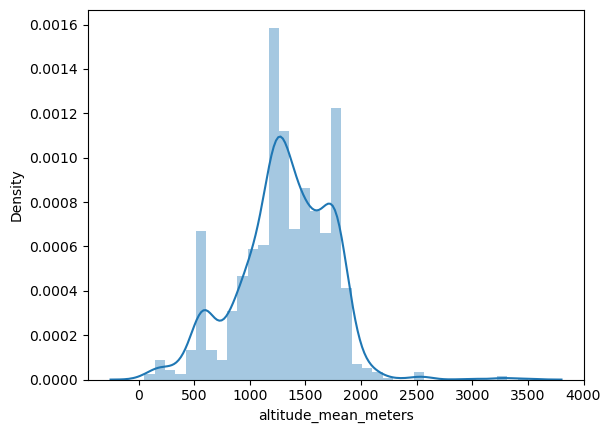

In [208]:
# Altitude distribution
sns.distplot(train.altitude_mean_meters.dropna());

The distribution seems reasonably OK with a mean value around 1300m. 

We can either replace the missing values with the overall mean, or with the mean altitude of each origin.

In [210]:
# Check the mean altitude of each origin
train.groupby('Country.of.Origin')['altitude_mean_meters'].mean()

Country.of.Origin
Brazil                          1073.146552
Burundi                         1790.000000
China                           1463.125000
Colombia                        1614.801170
Costa Rica                      1472.286957
Cote d'Ivoire                    200.000000
Ecuador                          800.000000
El Salvador                     1333.157895
Ethiopia                        1804.077436
Guatemala                       1432.239558
Haiti                            883.360000
Honduras                        1425.920000
India                            950.000000
Indonesia                       1481.944444
Japan                            170.000000
Kenya                           1648.369565
Laos                            1283.333333
Malawi                          1403.545455
Mauritius                        280.000000
Mexico                          1240.482759
Myanmar                         1152.835000
Nicaragua                       1092.361111
Panama        

To get a better estimation, let's replace the NaN values with the mean altitude of each origin 

We will apply the *transform* method, for details see the documentation:

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation

In [212]:
train.loc[train.altitude_mean_meters.isnull(),'altitude_mean_meters']=\
train.groupby('Country.of.Origin')['altitude_mean_meters'].transform('mean')

# You can also try using the lambda function
# train['altitude_mean_meters'] = train.groupby('Country.of.Origin')['altitude_mean_meters'].transform(lambda x: x.fillna(x.mean()))

In [214]:
# Drop the dupliate values
train.drop(columns=['Harvest.Year', 'Grading.Date', 'GradingDate',
                    'Expiration', 'Processing.Method'], inplace=True)
# Rename columns
train.rename(columns={'Owner.1': 'Owner', 'Country.of.Origin': 'Origin',
                      'Clean.Cup': 'CleanCup', 'Cupper.Points': 'CupperPoints',
                      'Total.Cup.Points': 'TCP', 'Category.One.Defects': 'C1D',
                      'Category.Two.Defects': 'C2D', 'altitude_mean_meters':
                      'AltitudeMean'}, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1310
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Owner                      1309 non-null   object 
 1   Origin                     1309 non-null   object 
 2   Aroma                      1309 non-null   float64
 3   Flavor                     1309 non-null   float64
 4   Aftertaste                 1309 non-null   float64
 5   Acidity                    1309 non-null   float64
 6   Body                       1309 non-null   float64
 7   Balance                    1309 non-null   float64
 8   Uniformity                 1309 non-null   float64
 9   CleanCup                   1309 non-null   float64
 10  Sweetness                  1309 non-null   float64
 11  CupperPoints               1309 non-null   float64
 12  TCP                        1309 non-null   float64
 13  Moisture                   1309 non-null   float64
 1

In [216]:
train.head()

,Owner,Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,CleanCup,...,AltitudeMean,GradingYear,ExpireYear,HarvestYear,Natural / Dry,Other,Pulped natural / honey,Semi-washed / Semi-pulped,Washed / Wet,NaN
1,Metad plc,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,...,2075.0,2015,2016,2014,False,False,False,False,True,False
2,Metad plc,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,...,2075.0,2015,2016,2014,False,False,False,False,True,False
3,Grounds for Health Admin,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,...,1700.0,2010,2011,2010,False,False,False,False,False,True
4,Yidnekachew Dabessa,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,...,2000.0,2015,2016,2014,True,False,False,False,False,False
5,Metad plc,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,...,2075.0,2015,2016,2014,False,False,False,False,True,False


## Exploratory Data Analysis

In [218]:
# Create a correlation heatmap
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

ValueError: could not convert string to float: 'Metad plc'

**What can you tell from the above correlation map?**


Since ExpireYear, GradingYear, and HarvestYear are highly correlated, we do not need to keep all three features in our prediction models.

In [ ]:
# Get the ranking in terms of sample distribution
train.Origin.value_counts()

In [ ]:
# Ranking by the mean of CQI index TCP
tcp_by_origin = train.groupby('Origin')['TCP'].mean().\
                        sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,10))
ax=sns.barplot(y=tcp_by_origin.index, x=tcp_by_origin.values,
          ax=ax, orient="h", palette = "copper")
ax.set_title('Overall Coffee Quality by Country', fontsize=16);

I'd be careful on Papua New Guinea and Japan for example as they have only one sample in the data.

Now, let's plot top 20 quality suppliers.

In [ ]:
tcp_by_owner = train.groupby('Owner')['TCP'].mean().nlargest(20)

fig, ax = plt.subplots(figsize=(8,10))
ax=sns.barplot(y=tcp_by_owner.index, x=tcp_by_owner.values,
          ax=ax, orient="h", palette = "copper")
ax.set_title('Top 20 Quality Coffee Suppliers', fontsize=16);

In [ ]:
sns.distplot(train.Aroma, bins=40);

If my personal coffee preference is on **Aroma** than other quality index, then which country of origin has the best Aroma score?

In [ ]:
Aroma_by_origin = train.groupby('Origin')['Aroma'].mean().nlargest(20)

fig, ax = plt.subplots(figsize=(8,10))
ax=sns.barplot(y=Aroma_by_origin.index, x=Aroma_by_origin.values,
          ax=ax, orient="h", palette = "summer")
ax.set_title('Best Aroma Coffee by Origin', fontsize=16);

Maybe I should choose my next coffee beans from Papua New Guinea! But wait, there is only one data point from Papua New Guinea. Uganda or Ethiopia coffee might be the choice.

<table><tr><td><img src="PapuaC.jpg" /></td><td><img src="Uganda.jpg" /></td><td><img src="Ethiopia.jpg" /></td></tr></table>


Number of Suppliers by Origin

## Geo-Mapping

In [ ]:
suppliers_by_origin = train.groupby('Origin')['Owner'].\
                    nunique().sort_values(ascending=False)
suppliers_by_origin

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

http://geopandas.org/gallery/plotting_with_geoplot.html

https://www.kaggle.com/abhinavkr28/data-on-global-map


In [ ]:
import geopandas as gpd

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
world.plot();

In [ ]:
# Get rid of Antarctica as it is irrelevant to our anlaysis
world = world[world.name!="Antarctica"]
world.plot();

In [ ]:
# Select relevant columns and rename them
world = world[['name', 'iso_a3', 'geometry']]
world.columns = ['Origin', 'code', 'geometry']

world.head()

In [ ]:
print(world[world.Origin.str.contains('United States', regex=False)])
print(world[world.Origin.str.contains('Puerto', regex=False)])
print(world[world.Origin.str.contains('Tanzania', regex=False)])
print(world[world.Origin.str.contains('Ivoire', regex=False)])
print(world[world.Origin.str.contains('Hawaii', regex=False)])


We need to replace some of the *Origin* names in our train set to match those in the world dataframe.
Also, since the data for Hawaii is missing, we have to find it from somewhere else.                                                                          

One of the useful place is US Gov Census data:
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [ ]:
states = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

In [ ]:
states.head()

In [ ]:
hawaii = states[states.NAME == 'Hawaii'][["NAME", "STUSPS","geometry" ]]
hawaii.rename(columns={'NAME':'Origin', 'STUSPS':'code'}, inplace=True)
hawaii

In [ ]:
world = world.append(hawaii, ignore_index=True)

world.tail()

In [ ]:
coffee = pd.merge(tcp_by_origin.to_frame(),
                        suppliers_by_origin.to_frame(), on="Origin")

In [ ]:
coffee.head()

In [ ]:
# Replace the origin names to match the values in world dataframe.
coffee.rename(index={'Tanzania, United Republic Of': 'Tanzania', 
                       'United States (Hawaii)': 'Hawaii', 
                       'United States (Puerto Rico)': 'Puerto Rico',
                       "Cote d'Ivoire": "Côte d'Ivoire"}, inplace=True)

In [ ]:
coffee

In [ ]:
world_coffee = world.join(coffee, on='Origin')
world_coffee.fillna(value=0,inplace=True)
world_coffee.sample(n=5)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
world_coffee.plot(column='TCP', ax=ax, cmap=cmap, legend=True)
ax.axis('off');
ax.set_title("World Coffee Quality Map", fontsize=16);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

world_coffee.plot(column='Owner', ax=ax, 
                  cmap="Paired", legend=True)
ax.axis('off');
ax.set_title("World Major Coffee Suppliers Map", fontsize=16);

## Regression
### Feature selection

Since TCP is the sum of the 10 CQI values, we will not use these features to predict TCP.

In [ ]:
train_reg = train [['TCP', 'Moisture', 'C1D', 'C2D', 'Quakers', 
                    'AltitudeMean', 'HarvestYear', 'Natural / Dry',  
                    'Other', 'Pulped natural / honey', np.nan,
                    'Semi-washed / Semi-pulped','Washed / Wet']]

In [ ]:
train_reg.info()

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Split the data
X = train_reg.drop(columns=['TCP'])
y = train_reg.TCP

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# train the model
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train, y_train)

In [ ]:
print("Model intercept:", ols.intercept_)
print("Model coefficients:", ols.coef_)

In [ ]:
ols.intercept_

In [ ]:
# make prediction
y_pred = ols.predict(X_test)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 1))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show();

We use RMSE to check the accuracy of the prediction

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE score: %.4f' % rmse)
print('R-Square score: %.2f' % r2)

In [ ]:
# Alternatively
ols.score(X_test, y_test)

In [ ]:
ols.score(X_train, y_train)

An R2 of around 0.18 is not good, however we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting.

In [ ]:
y_test.describe()

The min and max of the y_test data range from 70 to 87, an estimation error of 2.35 isn't so great but isn't too bad either.

### Ridge & Lasso Regression

Ridge Regression is a regularized version of Linear Regression

**Note**: Ridge model is senstive to the scale of the input features, we use StandardScaler to transform our features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

X_scaler = StandardScaler()
X_train_std = X_scaler.fit_transform(X_train)
X_test_std  = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_std = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test_std = y_scaler.transform(y_test[:, None])[:, 0]

ridge = Ridge(fit_intercept=False, alpha=0.05,       # since our data has already be centred, we set fit_intercept to false
              solver='auto', random_state=42)        # set solver to 'auto' to automatically decide solver based on data type

lasso = Lasso(fit_intercept=False, alpha=0.05,
              random_state=42)

In [ ]:
# Let's try Ridge regression first
ridge.fit(X_train_std, y_train_std)

In [ ]:
y_pred_ridge = ridge.predict(X_test_std)

In [ ]:
y_pred_ridge_inverse = y_scaler.inverse_transform(y_pred_ridge)
y_pred_ridge_inverse

In [ ]:
data = {'y_test': y_test, 'y_pred': y_pred_ridge_inverse} 

df_compare = pd.DataFrame(data=data).reset_index(drop=True)

df_compare.plot(figsize=(16,8));

In [ ]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_inverse))
rmse_ridge

In [ ]:
ridge.score(X_test_std, y_test_std)

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test, y_pred_ridge_inverse))

Not much improvement!

In [ ]:
# Lasso regression
lasso.fit(X_train_std, y_train_std)
y_pred_lasso = lasso.predict(X_test_std)
y_pred_lasso_inverse = y_scaler.inverse_transform(y_pred_lasso)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_inverse))
rmse_lasso

In [ ]:
lasso.score(X_test_std, y_test_std)

We can see that Lasso regression has predicted slightly better than both Linear and Ridge regressions, but not a good result we would have expected.

A good explanation on linear regression models at the link below:
    
https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

### Support Vector Machines

SVM is very powerful and versatile Machine Learning model, capable of
performing linear or nonlinear regression and classification.

In [ ]:
# Linear SV regression
from sklearn.svm import LinearSVR

lsvr = LinearSVR(fit_intercept=False, epsilon=0.7,
                 random_state=42, max_iter=4000)

lsvr.fit(X_train_std, y_train_std)
y_pred_lsvr = lsvr.predict(X_test_std)

In [ ]:
# Scale back the data to the original representation
y_pred_lsvr_inverse = y_scaler.inverse_transform(y_pred_lsvr)

# Accuracy
rmse_lsvr = np.sqrt(mean_squared_error(y_test, y_pred_lsvr_inverse))
print('LinearSVR RMSE Score: %.4f' % rmse_lsvr)
print('Variance score: %.4f' % lsvr.score(X_test_std, y_test_std))

In [ ]:
# Non-linear SVR
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=3, epsilon=0.6)
svr.fit(X_train_std, y_train_std)
y_pred_svr = svr.predict(X_test_std)

y_pred_svr_inverse = y_scaler.inverse_transform(y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_inverse))

print('SVR RMSE Score: %.4f' % rmse_svr)
print('Variance score: %.4f' % svr.score(X_test_std, y_test_std))

With a bit of twist in SVR's hyperparameters, we could get a better result.

### Decision Tree 

Let's try a different model - Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# max_depth contorlled how fine the tree learn the data. 
# Setting a high value tends to overfit the data.
tree = DecisionTreeRegressor(max_depth=4, random_state=42)   
tree.fit(X_train_std, y_train_std)
y_pred_tree = tree.predict(X_test_std)

In [ ]:
# Scale back the data to the original representation
y_pred_tree_inverse = y_scaler.inverse_transform(y_pred_tree)

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree_inverse))
print('Tree RMSE Score: %.3f' % rmse_tree)

In [ ]:
print("R2 on training set: {:.3f}".format(
    tree.score(X_train_std, y_train_std)))
print("R2 on test set: {:.3f}".format(
    tree.score(X_test_std, y_test_std)))

We can tell that the tree model is overfitting the training set.

### Cross-Validation

In [ ]:
# Evaluate models using cross-validation
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, X_train_std, y_train_std,
                     scoring='neg_root_mean_squared_error', cv=5)

rmse_scores = -scores_tree

print("RMSE:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

In [ ]:
# Evaluate SVR model
scores_svr = cross_val_score(svr, X_train_std, y_train_std,
                     scoring='neg_root_mean_squared_error', cv=5)

rmse_scores = -scores_svr

print("RMSE:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

**Conclusion:** The Decision Tree model has a mean RMSE score of 0.9669, with 0.0919 std.; while the SVR model has a mean RMSE of 0.9317 with 0.0895 std. It is clear that the SVR model performs better than the Decesions Tree model.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, max_depth=5,
                            min_samples_split=2, min_samples_leaf=6,
                            n_jobs=-1, random_state=42)

rfr.fit(X_train_std, y_train_std)
y_pred_rfr = rfr.predict(X_test_std)

y_pred_rfr_inverse = y_scaler.inverse_transform(y_pred_rfr)

rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr_inverse))

print('RF RMSE Score: %.4f' % rmse_rfr)
print('Variance score: %.4f' % rfr.score(X_test_std, y_test_std))

### Model Fine-Tuning
Now, if we decided to use RandomForestRegressor, then how can we fine-tune its hyperparameters to get the best result? We can use scikit-learn's GridSearchCV.

In [ ]:
# create a dictionary of parameters and list of values
params = {'n_estimators': [600, 800, 1000],
          'max_depth': [None, 5, 10],
          'min_samples_leaf': [4, 6, 8],
          'min_samples_split': [2, 4, 6],
          'bootstrap': [True, False]}

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
GS = GridSearchCV(rfr, param_grid=params, cv=5,
                  scoring='neg_root_mean_squared_error')
GS.fit(X_train_std, y_train_std)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

In [ ]:
# use best estimator to make prediction
y_pred_grid=GS.predict(X_test_std)
y_pred_grid_inverse = y_scaler.inverse_transform(y_pred_grid)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_grid_inverse))
print('RF RMSE Score: %.4f' % rmse_rf)

In [ ]:
# Instantiate with the best parameters
rfr_final = RandomForestRegressor(n_estimators=600, max_depth=10, 
                      min_samples_leaf=6,min_samples_split=2, 
                      random_state=42)

rfr_final.fit(X_train_std, y_train_std)
y_pred_grid = rfr_final.predict(X_test_std)
y_pred_grid_inverse = y_scaler.inverse_transform(y_pred_grid)

rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_grid_inverse))
print('RF RMSE Score: %.4f' % rmse_rfr)
print('Variance score: %.4f' % rfr_final.score(X_test_std, y_test_std))

The best result we have got so far.

In [ ]:
# Plot feature importance
sns.set()
feature_rank = pd.Series(rfr_final.feature_importances_, 
                         index=X_train.columns)

plt.figure(figsize=(8, 8))
feature_rank.nlargest(15).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance', fontsize=15)

## Excercise:

**Can we predict where the coffee beans come from?**

This might be challenging as in some cases there is only one instance (e.g. Japan)  - i.e. Imbalanced Dataset

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
    
https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
    
https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/
    
https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/applications/plot_multi_class_under_sampling.html
    
https://elitedatascience.com/imbalanced-classes

http://imbalanced-learn.org/en/stable/over_sampling.html#a-practical-guide

Imbalanced dataset is quite common in real life, but what are the solutions?

 - Collect more data if you can.
 - Use other performance measures than accuracy.(e.g. confusion matrix,PR,ROC)
 - Resample the dataset (undersampling/oversampling)
 - Synthetic sampling (e.g. SMOTE - Synthetic Minority Over-sampling Technique)

In [ ]:
# >>> from sklearn.preprocessing import StandardScaler
# >>> scaler = StandardScaler()
# >>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# >>> cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
# >>> y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
# >>> conf_mx = confusion_matrix(y_train, y_train_pred)
# >>> conf_mx

# plt.matshow(conf_mx, cmap=plt.cm.gray)
# plt.show()